一、目标检测及其著名模型
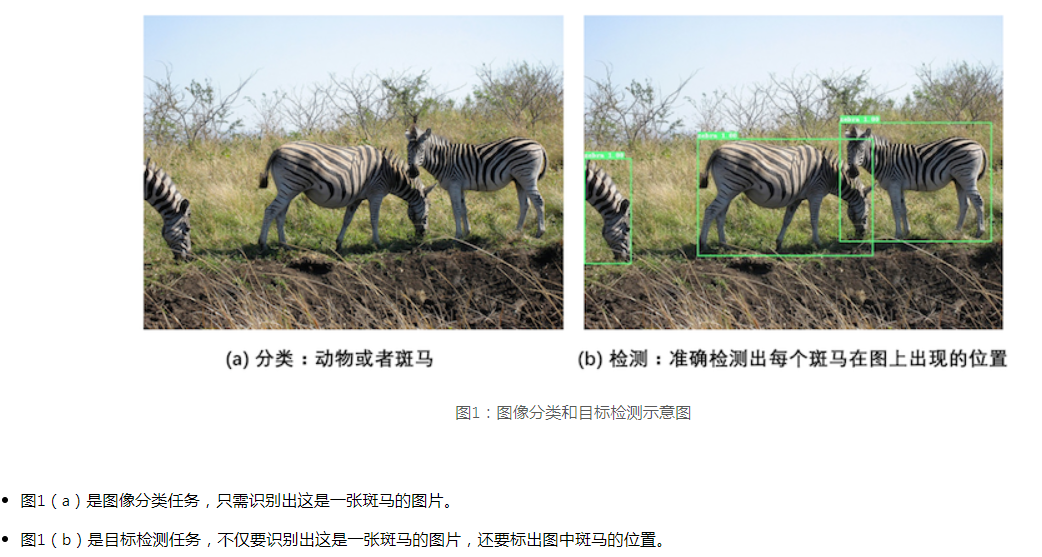

目标检测是图像识别的升级版，需要识别出图片中包含的物体（多种物体），并且标注出位置信息（用框标出来）。如果目标检测算法足够快，便可处理视频帧，做到视频目标检测。

用最基本的方法，记得吴恩达的机器学习公开课上提过，假设我们已经有了用于图像识别的模型，但是无法标注出位置信息，我们可以使用不同大小的滑动窗口，在输入图片上进行滑动(从左到右从上往下全覆盖，并且使用多种尺寸的滑动窗口），判断目标并得到位置。但这样计算量太大了，没法使用。

所以新的目标检测算法，会生成可能包含物体的候选区域，只在候选区域上进行识别。著名的算法有利用Selective Search的R-CNN，Fast R-CNN、使用RPN的Faster R-CNN，Mask R-CNN等。

YoloV3算法只使用一个网络同时产生候选区域并预测出物体的类别和位置，叫做单阶段检测算法。

二、基础知识、术语等概念

把物体框出来的方框，叫做bounding box 边界框，一个方框可用两种表达方式记录，一般叫做xyxy(记录方框最上角和右下角的坐标)和xywh(记录方框中心坐标及长度和宽度)。

训练集中，真实的包含目标的方框（一般是人工标注的）叫做ground truth box，真实框；模型预测出来的框叫prediction box预测框。

还有一种框，是人们假想出来的框，也可以是随机生成的框，叫做锚框(anchor box)，图像识别就发生在锚框里。

 

# 绘制锚框
def draw_anchor_box(center, length, scales, ratios, img_height, img_width):
    """
    以center为中心，产生一系列锚框
    其中length指定了一个基准的长度
    scales是包含多种尺寸比例的list
    ratios是包含多种长宽比的list
    img_height和img_width是图片的尺寸，生成的锚框范围不能超出图片尺寸之外
    """
    bboxes = []
    for scale in scales:
        for ratio in ratios:
            h = length*scale*math.sqrt(ratio)
            w = length*scale/math.sqrt(ratio) 
            x1 = max(center[0] - w/2., 0.)
            y1 = max(center[1] - h/2., 0.)
            x2 = min(center[0]   w/2. - 1.0, img_width - 1.0)
            y2 = min(center[1]   h/2. - 1.0, img_height - 1.0)
            print(center[0], center[1], w, h)
            bboxes.append([x1, y1, x2, y2])

    for bbox in bboxes:
        draw_rectangle(currentAxis, bbox, edgecolor = 'b')
 

蓝色方框就是生成的3个不同长宽比的锚框。

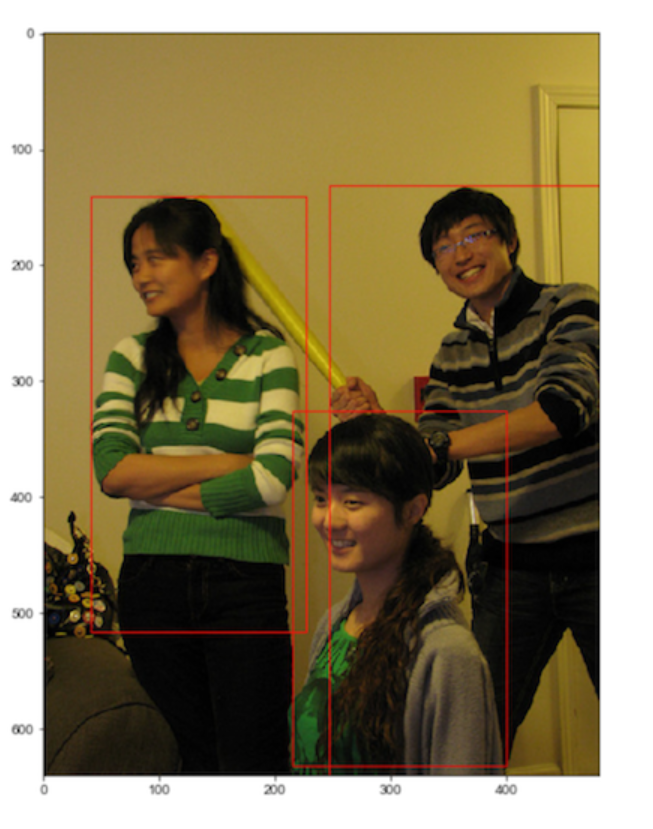 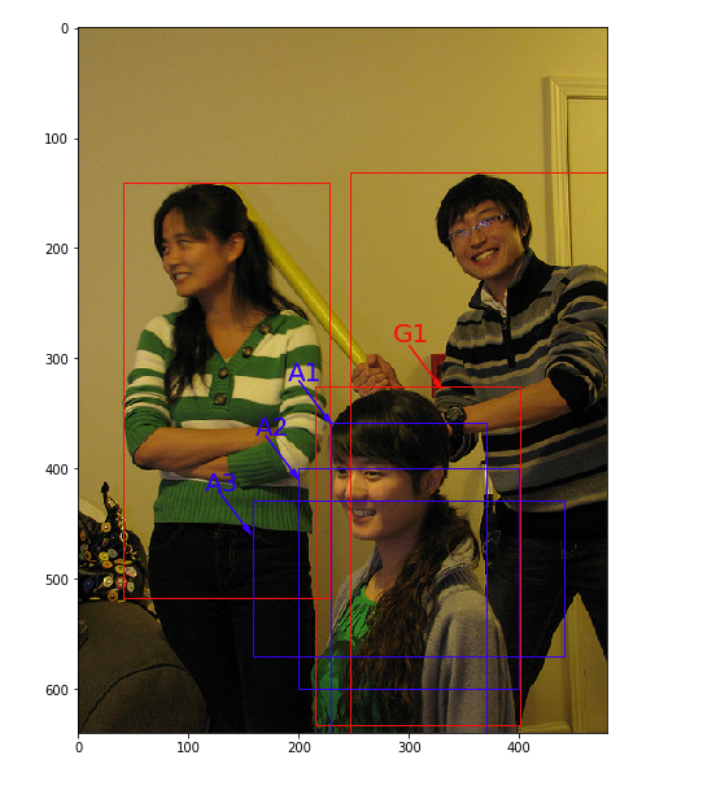